This (article] [http://pbpython.com/simple-graphing-pandas.html] will walk through how to start doing some simple graphing in pandas.
I am using a new data file that is the same format as my previous article but includes data for only 20 customers.
First we are going to import pandas, numpy and matplot lib. 
I am also showing the versions I'm testing so you can make sure yours is compatible.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

'1.2.4'

Next, enable iPython to display matplotlib graphs. As an alternative you can run ipython notebook.

In [2]:
%matplotlib inline

We will read in the file like we did in the previous article but I'm going to tell it to treat the date column as a date field so I can do some re-sampling later.

In [3]:
sales=pd.read_csv("../data/sample-salesv2.csv",parse_dates=['date'])
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


Now that we have read in the data, we can do some quick analysis

In [4]:
sales.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


We can actually learn some pretty helpful info from this simple command:
For example, we can tell that customers on average purchases 10.3 items per transaction and that the average cost of the transaction was $579.84. It is also easy to see the min and max so you understand the range of the data.

In [5]:
sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

It is easy to call describe on a single column too. I can see that my average price is \$56.18 but it ranges from \$10.06 to \$99.97.

I am showing the output of dtypes so that you can see that the date column is a datetime field. I also scan this to make sure that any columns that have numbers are floats or ints so that I can do additional analysis in the future.

In [6]:
sales.dtypes

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

Now we remove some columns to make additional analysis easier.

In [7]:
customers = sales[['name','ext price','date']]
customers.head()

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",289.92,2014-03-01 10:51:24
3,Waters-Walker,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,1793.52,2014-01-03 08:14:27


This representation has multiple lines for each customer. In order to understand purchasing patterns, let's group all the customers by name.

In [8]:
customer_group = customers.groupby('name')
customer_group.size()

name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59
Volkman, Goyette and Lemke       48
Waelchi-Fahey                    54
Waters-Walker                    50
dtype: int64

Now that our data is in a simple format to manipulate, let's determine how much each customer purchased during our time frame.

The sum function allows us to quickly sum up all the values by customer. We can also sort the data using the sort command.

In [9]:
sales_totals = customer_group.sum()
sales_totals.sort_values(by=['ext price']).head()

,ext price
name,
"Davis, Kshlerin and Reilly",19054.76
Huel-Haag,21087.88
Gorczany-Hahn,22207.90
Hamill-Hackett,23433.78
Heidenreich-Bosco,25428.29


Now that we know what the data look like, tt is very simple to create a quick bar chart plot.

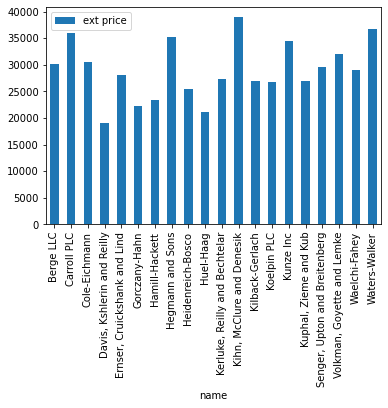

In [10]:
my_plot = sales_totals.plot(kind='bar')

Unfortunately this chart is a little ugly. With a few tweaks we can make it a little more impactful.
Let's try:
- sorting the data in descending order.
- Removing the legend
- Adding a title
- Labeling the axes

Text(0, 0.5, 'Sales ($)')

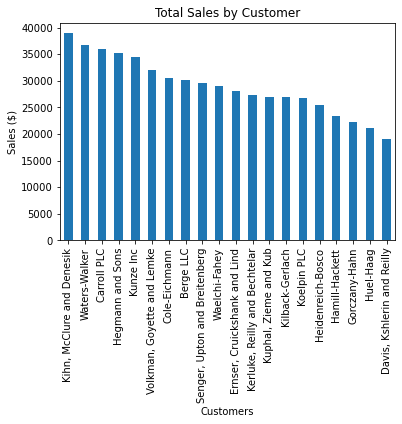

In [11]:
my_plot = sales_totals.sort_values(by=['ext price'],ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

This actually tells us a little about our biggest customers and how much difference there is between their sales and our smallest customers.

Now, let's try to see how the sales break down by category.

In [12]:
customers = sales[['name','category','ext price','date']]
customers.head()

,name,category,ext price,date
0,Carroll PLC,Belt,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,Shoes,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",Shirt,289.92,2014-03-01 10:51:24
3,Waters-Walker,Shirt,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,Shirt,1793.52,2014-01-03 08:14:27


We can use groupby to organize the data by category and name.

In [13]:
category_group=customers.groupby(['name','category']).sum()
category_group.head()

ext price
name        category           
Berge LLC   Belt        6033.53
            Shirt       9670.24
            Shoes      14361.10
Carroll PLC Belt        9359.26
            Shirt      13717.61

The category representation looks good but we need to break it apart to graph it as a stacked bar graph. Unstack can do this for us.

In [14]:
category_group.unstack().head()

ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly     1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind   5894.38  16944.19   5250.45

Now plot it.

Text(0, 0.5, 'Sales')

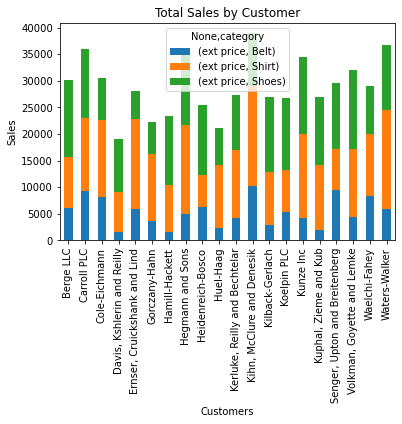

In [15]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")

Now clean some of this up a little bit.
We can specify the figure size and customize the legend.

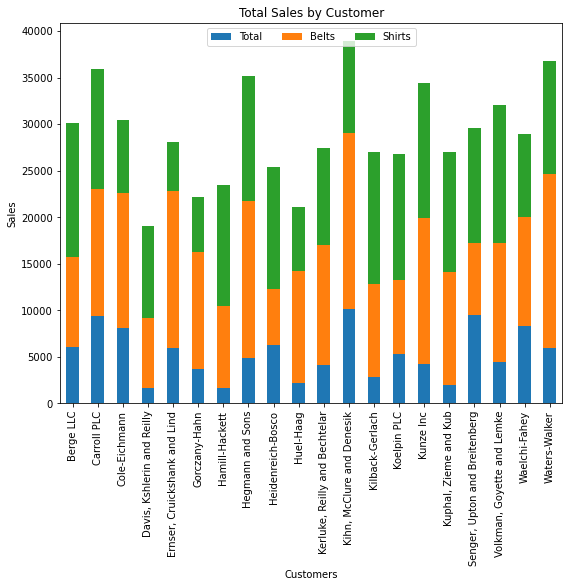

In [16]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(9, 7))
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Total","Belts","Shirts","Shoes"], loc=9,ncol=4)

Now that we know who the biggest customers are and how they purchase products, we might want to look at purchase patterns in more detail.

Let's take another look at the data and try to see how large the individual purchases are. A histogram allows us to group purchases together so we can see how big the customer transactions are.

In [17]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:03
1,1018.78,2014-07-29 02:10:44
2,289.92,2014-03-01 10:51:24
3,413.40,2013-11-17 20:41:11
4,1793.52,2014-01-03 08:14:27


Text(0, 0.5, 'Number of orders')

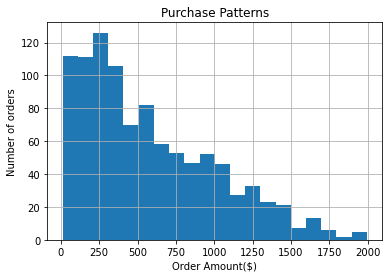

In [18]:
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")

After looking at this group

We can look at purchase patterns over time. We can see that most of our transactions are less than $500 and only a very few are about $1500.

Another interesting way to look at the data would be by sales over time. Do we have certain months where we are busier than others?

Let's get the data down to order size and date.

In [19]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()

,ext price,date
0,578.24,2014-09-27 07:13:03
1,1018.78,2014-07-29 02:10:44
2,289.92,2014-03-01 10:51:24
3,413.40,2013-11-17 20:41:11
4,1793.52,2014-01-03 08:14:27


If we want to analyze the data by date, we need to set the date column as the index.

In [20]:
purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()

,ext price
date,
2014-09-27 07:13:03,578.24
2014-07-29 02:10:44,1018.78
2014-03-01 10:51:24,289.92
2013-11-17 20:41:11,413.40
2014-01-03 08:14:27,1793.52


One of the really cool things that pandas allows us to do is resample the data. If we want to look at the data by month, we can easily resample and sum it all up.

purchase_patterns.resample('M',how=sum)

Plotting the data is now very easy

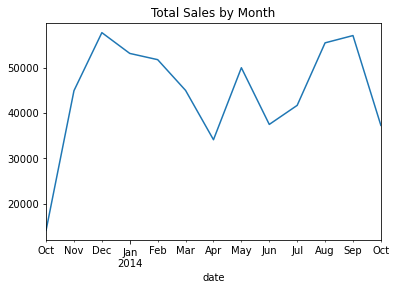

In [21]:
purchase_plot = purchase_patterns.resample('M').sum().plot(title="Total Sales by Month",legend=None)

December is our peak month and April is the slowest.

Let's say we really like this plot and want to save it somewhere for a presentation.

In [22]:
fig = purchase_plot.get_figure()
fig.savefig("total-sales.png")